In [ ]:
# Load the CTG data set
ctg <- read.csv("/content/Cardiotocographic.csv")


In [ ]:
head(ctg)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,⋯,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,120,0.000000000,0,0.000000000,0.000000000,0,0.000000000,73,0.5,43,⋯,62,126,2,0,120,137,121,73,1,2
2,132,0.006379585,0,0.006379585,0.003189793,0,0.000000000,17,2.1,0,⋯,68,198,6,1,141,136,140,12,0,1
3,133,0.003322259,0,0.008305648,0.003322259,0,0.000000000,16,2.1,0,⋯,68,198,5,1,141,135,138,13,0,1
4,134,0.002560819,0,0.007682458,0.002560819,0,0.000000000,16,2.4,0,⋯,53,170,11,0,137,134,137,13,1,1
5,132,0.006514658,0,0.008143322,0.000000000,0,0.000000000,16,2.4,0,⋯,53,170,9,0,137,136,138,11,1,1
6,134,0.001049318,0,0.010493179,0.009443861,0,0.002098636,26,5.9,0,⋯,50,200,5,3,76,107,107,170,0,3


In [ ]:
summary(ctg)

       LB              AC                 FM                 UC          
 Min.   :106.0   Min.   :0.000000   Min.   :0.000000   Min.   :0.000000  
 1st Qu.:126.0   1st Qu.:0.000000   1st Qu.:0.000000   1st Qu.:0.001876  
 Median :133.0   Median :0.001630   Median :0.000000   Median :0.004482  
 Mean   :133.3   Mean   :0.003170   Mean   :0.009474   Mean   :0.004357  
 3rd Qu.:140.0   3rd Qu.:0.005631   3rd Qu.:0.002512   3rd Qu.:0.006525  
 Max.   :160.0   Max.   :0.019284   Max.   :0.480634   Max.   :0.014925  
       DL                 DS                  DP                 ASTV      
 Min.   :0.000000   Min.   :0.000e+00   Min.   :0.0000000   Min.   :12.00  
 1st Qu.:0.000000   1st Qu.:0.000e+00   1st Qu.:0.0000000   1st Qu.:32.00  
 Median :0.000000   Median :0.000e+00   Median :0.0000000   Median :49.00  
 Mean   :0.001885   Mean   :3.585e-06   Mean   :0.0001566   Mean   :46.99  
 3rd Qu.:0.003264   3rd Qu.:0.000e+00   3rd Qu.:0.0000000   3rd Qu.:61.00  
 Max.   :0.015385   Max.  

In [ ]:
head(train)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,⋯,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
526,158,0.011655012,0.025641026,0.000000000,0.000000000,0,0,42,0.9,0,⋯,151,194,2,0,180,175,178,10,0,1
195,150,0.000000000,0.000000000,0.006355932,0.000000000,0,0,56,0.5,19,⋯,148,167,2,0,153,157,158,3,0,2
1842,137,0.002018163,0.004036327,0.007063572,0.006054490,0,0,58,1.9,0,⋯,52,161,8,2,139,132,140,28,1,1
1142,122,0.000000000,0.000000000,0.004950495,0.004950495,0,0,26,1.3,0,⋯,85,132,3,2,126,119,123,10,1,1
1253,112,0.000000000,0.000000000,0.003976143,0.000000000,0,0,23,1.3,11,⋯,104,144,1,0,112,113,114,2,-1,1
1268,119,0.000000000,0.000000000,0.002577320,0.000000000,0,0,23,1.5,0,⋯,106,145,3,1,125,124,126,3,0,1


In [ ]:
require(nnet)
# Fit a multinomial logistic regression model to the training set
model <- multinom(NSP ~ LB + AC + FM + UC + DL + DS + DP + ASTV + MSTV + ALTV + MLTV + Width + Min + Max + Nmax + Nzeros + Mode + Mean + Median + Variance + Tendency, data=train)
# model <- multinom(NSP ~  LB + AC + FM + UC + DL , data=train)


# weights:  69 (44 variable)
initial  value 1634.735086 
iter  10 value 658.528104
iter  20 value 591.663252
iter  30 value 443.744085
iter  40 value 401.539956
iter  50 value 396.354994
iter  60 value 360.905401
iter  70 value 333.631218
iter  80 value 330.916851
iter  90 value 308.539024
iter 100 value 308.538709
final  value 308.538709 
stopped after 100 iterations


In [ ]:
summary(model)

Call:
multinom(formula = NSP ~ LB + AC + FM + UC + DL + DS + DP + ASTV + 
    MSTV + ALTV + MLTV + Width + Min + Max + Nmax + Nzeros + 
    Mode + Mean + Median + Variance + Tendency, data = train)

Coefficients:
  (Intercept)         LB         AC       FM        UC         DL         DS
2   -18.62091 -0.1122981 -1111.3458 16.38077 -335.1517  -49.97592 -0.1622079
3   -22.64164  0.5444708  -101.1991 21.91418 -514.2315 -219.11449 10.7215404
         DP       ASTV       MSTV       ALTV       MLTV       Width       Min
2  88.01692 0.07525848 -0.5186594 0.02540151 0.00808540 0.006768958 0.0151910
3 118.29357 0.20465042 -0.6896152 0.06046114 0.08588878 0.010221789 0.0263206
         Max       Nmax     Nzeros       Mode        Mean     Median   Variance
2 0.02195996  0.1459537 -0.5112850 0.02488900  0.11760463  0.0282119 0.03988628
3 0.03654240 -0.1463872  0.6646822 0.02160642 -0.07920387 -0.5026790 0.06575981
    Tendency
2 0.03635671
3 0.96934285

Std. Errors:
  (Intercept)         LB     

In [ ]:
# Make predictions on the testing set
predicted_classes <- predict(model, newdata=test)


In [ ]:
#Confusion Matrix & Misclassification Error - Training Data
p <- predict(model,test)
head(p)
head(test$NSP)

tab <- table(p,test$NSP)
tab
acc=sum(diag(tab))/sum(tab)
acc
1-acc

[1] 1 1 3 1 3 1
Levels: 1 2 3

[1] 1 1 3 1 3 1

   
p     1   2   3
  1 466  32   4
  2  15  56   6
  3   2   8  49

[1] 0.8949843

[1] 0.1050157

In [ ]:
# Create a confusion matrix
confusion_matrix <- table(test$NSP, predicted_classes)

# Calculate precision, recall, and F1-score for each class
precision <- diag(confusion_matrix)/colSums(confusion_matrix)
recall <- diag(confusion_matrix)/rowSums(confusion_matrix)
f1_score <- 2*precision*recall/(precision + recall)

# Calculate overall accuracy
overall_accuracy <- sum(diag(confusion_matrix))/sum(confusion_matrix)

# Print the results
cat("Confusion Matrix:\n")
print(confusion_matrix)
cat("\n")
cat(sprintf("Precision: %s\n", paste(round(precision, 3), collapse = ", ")))
cat(sprintf("Recall: %s\n", paste(round(recall, 3), collapse = ", ")))
cat(sprintf("F1-Score: %s\n", paste(round(f1_score, 3), collapse = ", ")))
cat(sprintf("Overall Accuracy: %s\n", round(overall_accuracy, 3)))


Confusion Matrix:
   predicted_classes
      1   2   3
  1 466  15   2
  2  32  56   8
  3   4   6  49

Precision: 0.928, 0.727, 0.831
Recall: 0.965, 0.583, 0.831
F1-Score: 0.946, 0.647, 0.831
Overall Accuracy: 0.895


# ***variable ***

In [ ]:
# Load the CTG data set
data <- read.csv("/content/Cardiotocographic.csv")

In [ ]:
-normailse datra
-verfier les caribale manaquante
-calcul des valeurs manaqunats
-
-split data
- creer model
- choiser des variable pertintnte
- tester model
-faire les test z-test p-value Wald .....


In [ ]:
# get number of variables
ncol(data)

[1] 22

In [ ]:
# Afficher le nombre de valeurs manquantes pour chaque variable dans "data"
colSums(is.na(data))

LB       AC       FM       UC       DL       DS       DP     ASTV 
       0        0        0        0        0        0        0        0 
    MSTV     ALTV     MLTV    Width      Min      Max     Nmax   Nzeros 
       0        0        0        0        0        0        0        0 
    Mode     Mean   Median Variance Tendency      NSP 
       0        0        0        0        0        0

In [ ]:
# suppriner le var na
data <- na.omit(data)

In [ ]:
#supprimer les valeurs doublons:
sum(duplicated(data))
data <- unique(data)

[1] 0

In [ ]:
# normalsie data
mydata <- scale(mydata)

In [ ]:
#2. Descriptive statistics
#  install.packages("psych")

psych::describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LB,1,2114,1.333070e+02,9.835653e+00,1.330000e+02,1.332665e+02,10.378200000,106.0,1.600000e+02,5.400000e+01,0.01910739,-0.2861275,2.139197e-01
AC,2,2114,3.179558e-03,3.864564e-03,1.643413e-03,2.527047e-03,0.002436524,0.0,1.928375e-02,1.928375e-02,1.20455107,0.7641063,8.405199e-05
FM,3,2114,9.505944e-03,4.679718e-02,0.000000e+00,1.350766e-03,0.000000000,0.0,4.806338e-01,4.806338e-01,7.77952151,63.6783200,1.017811e-03
UC,4,2114,4.376996e-03,2.934344e-03,4.506536e-03,4.288334e-03,0.003299626,0.0,1.492537e-02,1.492537e-02,0.15151148,-0.6456329,6.382025e-05
DL,5,2114,1.895269e-03,2.967248e-03,0.000000e+00,1.256364e-03,0.000000000,0.0,1.538462e-02,1.538462e-02,1.71084745,2.4609763,6.453590e-05
DS,6,2114,3.605060e-06,6.310178e-05,0.000000e+00,0.000000e+00,0.000000000,0.0,1.353180e-03,1.353180e-03,17.73576063,318.1871538,1.372426e-06
DP,7,2114,1.574611e-04,5.812202e-04,0.000000e+00,0.000000e+00,0.000000000,0.0,5.347594e-03,5.347594e-03,4.25884693,19.8690843,1.264120e-05
ASTV,8,2114,4.699101e+01,1.717421e+01,4.900000e+01,4.688121e+01,20.756400000,12.0,8.700000e+01,7.500000e+01,-0.01137309,-1.0529565,3.735290e-01
MSTV,9,2114,1.334768e+00,8.842350e-01,1.200000e+00,1.221158e+00,0.741300000,0.2,7.000000e+00,6.800000e+00,1.65450939,4.6704791,1.923159e-02


In [ ]:
# data to frame and also change Nsp to numeric varbale

mydata$NSP <- as.factor(data$NSP)
mydata$NSP <- as.numeric(data$NSP)
data <- as.data.frame(data)



In [ ]:
# Calculate the correlation matrix
cor_matrix <- cor(data, use = "pairwise.complete.obs")

# Display the correlation matrix
cor_matrix<-as.data.frame(cor_matrix)
cor_matrix

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,⋯,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
LB,1.000000000,-0.082333673,-0.033900826,-0.149701214,-0.15976690,-0.055002208,-0.105698434,0.30339764,-0.27844123,0.28387946,⋯,0.36018405,0.27327239,-0.113242091,-0.004910469,0.70808564,0.72218215,0.78849926,-0.13457109,0.294561006,0.14594869
AC,-0.082333673,1.000000000,0.046842376,0.082877669,-0.11287157,-0.043948782,-0.131935051,-0.28091486,0.20719505,-0.37393110,⋯,-0.15612840,0.39214764,0.188170820,-0.007601815,0.24321559,0.27030550,0.27249510,0.12513837,0.031535322,-0.36368982
FM,-0.033900826,0.046842376,1.000000000,-0.071036335,0.05002781,-0.010864757,0.265525207,-0.10484049,0.12147692,-0.07497596,⋯,-0.15429467,0.09951087,0.164440153,-0.018181818,-0.06136765,-0.08980589,-0.07254813,0.17912575,-0.001320329,0.08802523
UC,-0.149701214,0.082877669,-0.071036335,1.000000000,0.28436571,0.006390573,0.086479797,-0.23096555,0.28622948,-0.30734759,⋯,-0.11408952,0.11473609,0.079315140,0.054964320,-0.10918581,-0.19268192,-0.14497140,0.23625770,-0.071004566,-0.20390421
DL,-0.159766895,-0.112871569,0.050027809,0.284365709,1.00000000,0.115143859,0.230439344,-0.11804486,0.56343878,-0.27246455,⋯,-0.55599919,0.21538140,0.396626132,0.234048932,-0.35143573,-0.53190047,-0.39219283,0.56663021,0.001459210,0.06363749
DS,-0.055002208,-0.043948782,-0.010864757,0.006390573,0.11514386,1.000000000,0.009763207,0.03744920,0.03456307,-0.03053644,⋯,-0.07186474,-0.02188965,0.006735687,0.049343288,-0.21676052,-0.16244278,-0.16540635,0.13293754,-0.075016368,0.13611977
DP,-0.105698434,-0.131935051,0.265525207,0.086479797,0.23043934,0.009763207,1.000000000,0.04900067,0.26859512,-0.13865356,⋯,-0.27908942,0.11933338,0.220802540,0.056620532,-0.43808276,-0.49317793,-0.44941235,0.50472192,-0.218078564,0.49021016
ASTV,0.303397645,-0.280914858,-0.104840488,-0.230965553,-0.11804486,0.037449199,0.049000670,1.00000000,-0.42882375,0.45671006,⋯,0.27816752,-0.11335297,-0.169828041,-0.149995267,0.05564530,0.07193430,0.11737975,-0.14696762,-0.010413769,0.46971177
MSTV,-0.278441228,0.207195052,0.121476923,0.286229476,0.56343878,0.034563075,0.268595122,-0.42882375,1.00000000,-0.46912081,⋯,-0.62563588,0.41019161,0.502912261,0.265764802,-0.30672853,-0.44476999,-0.33523355,0.55594761,-0.062913273,-0.10093294
ALTV,0.283879460,-0.373931103,-0.074975960,-0.307347593,-0.27246455,-0.030536440,-0.138653557,0.45671006,-0.46912081,1.00000000,⋯,0.42706974,-0.28544206,-0.279869564,-0.121313275,0.16386308,0.22105533,0.18499829,-0.28166352,0.037583017,0.42163161


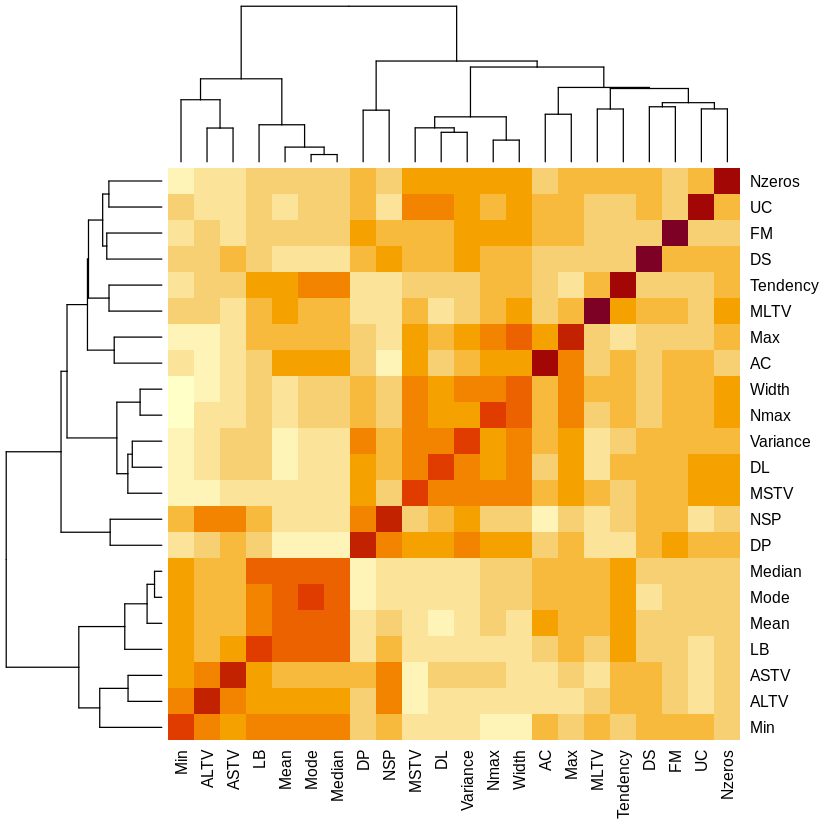

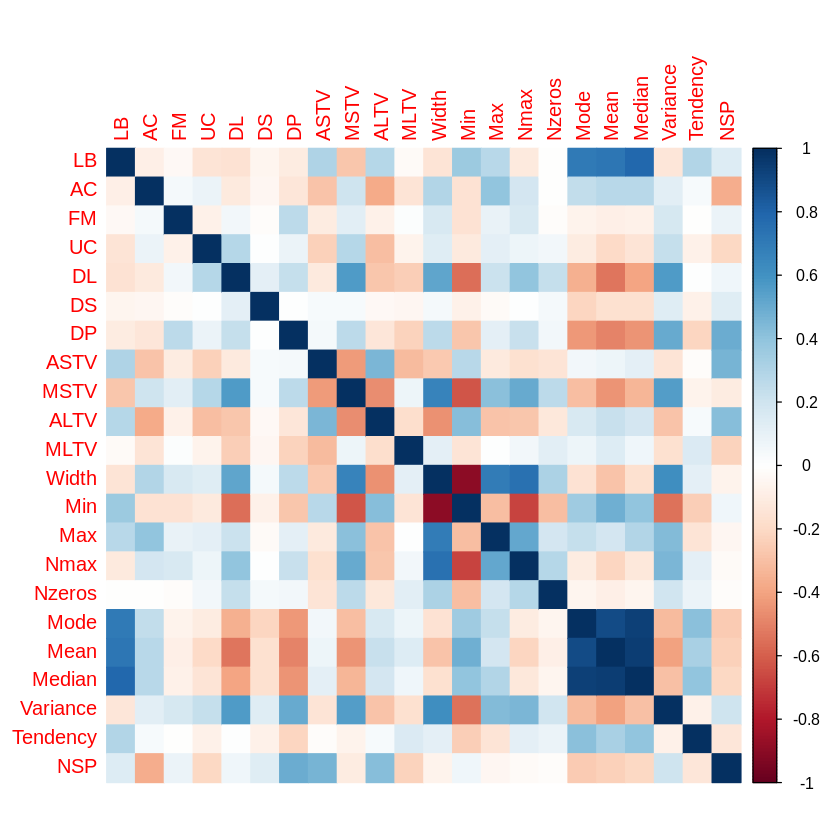

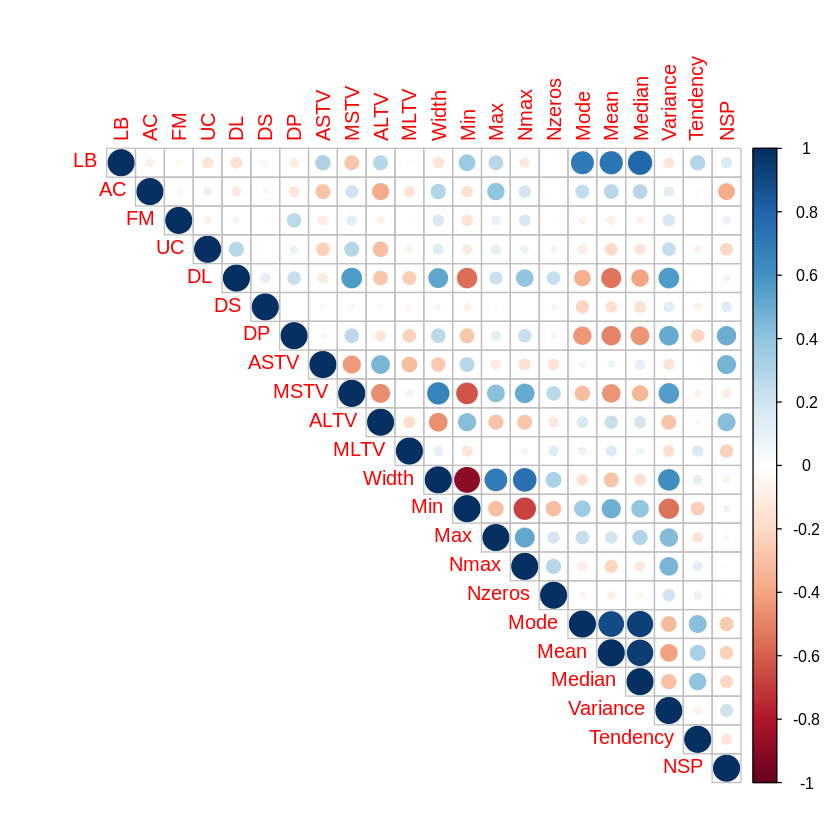

In [ ]:
# install.packages("corrplot")
# Afficher la matrice de corrélation avec heatmap()
heatmap(cor_matrix)

# Afficher la matrice de corrélation avec corrplot()
library(corrplot)
 corrplot(cor_matrix, method = "color")

corrplot(cor_matrix, type = "upper", method = "circle")


In [ ]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



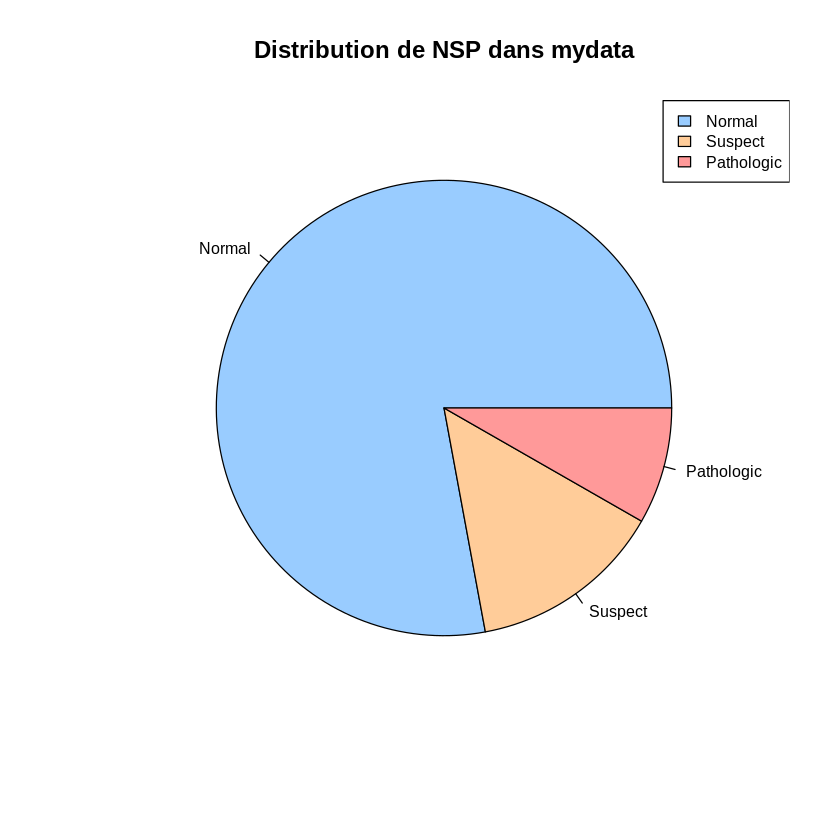

In [ ]:
# Charger les packages nécessaires
library(ggplot2)
library(dplyr)

# Charger le dataset "ctg" depuis le package "MLbench"
# data("ctg", package = "MLbench")

# Afficher la distribution de la variable cible "NSP"
a <- table(data$NSP)
label <- c("Normal", "Suspect", "Pathologic")
pie(a, labels = label, col = c("#99CCFF", "#FFCC99", "#FF9999"), main = "Distribution de NSP dans mydata", cex = 0.8)
legend("topright", label, fill = c("#99CCFF", "#FFCC99", "#FF9999"), cex = 0.8)


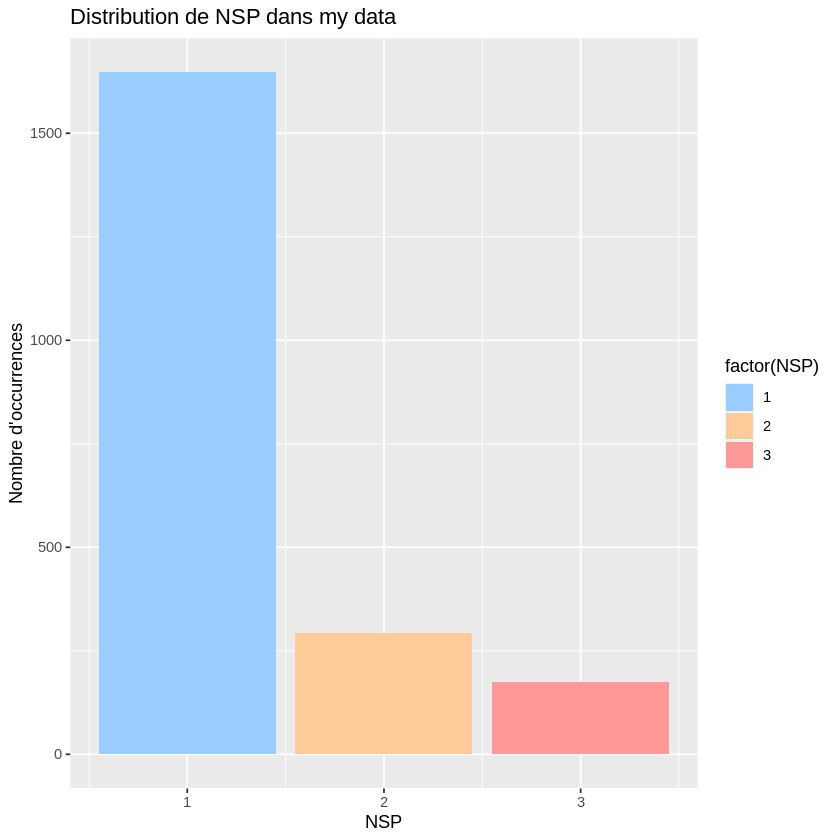

In [ ]:

# # Afficher un diagramme en barres pour la variable cible "NSP"
 data %>% ggplot(aes(x = NSP, fill = factor(NSP))) + geom_bar() + labs(title = "Distribution de NSP dans my data", x = "NSP", y = "Nombre d'occurrences") + scale_fill_manual(values = c("#99CCFF", "#FFCC99", "#FF9999"))


# **model  **

In [ ]:
# Set a seed for reproducibility
set.seed(123)

# Split the data set into a training set (70%) and a testing set (30%)
train_index <- sample(nrow(data), 0.7*nrow(data))
train <- data[train_index,]
test <- data[-train_index,]
head(train)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,⋯,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
531,142,0.015590200,0.07126949,0.000000000,0.002227171,0,0.000000000,32,3.1,0,⋯,51,200,10,0,167,154,160,55,1,1
196,150,0.000000000,0.00000000,0.007042254,0.000000000,0,0.000000000,54,0.5,13,⋯,147,163,2,0,153,155,157,2,0,1
1854,138,0.011433597,0.00000000,0.007036060,0.000879507,0,0.000000000,50,1.2,0,⋯,73,171,7,0,148,146,148,12,1,1
1153,122,0.003433476,0.00000000,0.000000000,0.009442060,0,0.000000000,18,2.4,0,⋯,69,143,1,1,131,117,120,40,1,1
1264,119,0.004444444,0.00000000,0.007407407,0.001481481,0,0.000000000,23,1.5,5,⋯,70,145,1,1,126,122,125,9,1,1
1279,115,0.006944444,0.00000000,0.006076389,0.000000000,0,0.000868056,17,2.0,0,⋯,84,157,0,1,120,117,119,13,0,1


In [ ]:
# first mdoel
require(nnet)
# Fit a multinomial logistic regression model to the training set
# model <- multinom(NSP ~ LB + AC + FM + UC + DL + DS + DP + ASTV + MSTV + ALTV + MLTV + Width + Min + Max + Nmax + Nzeros + Mode + Mean + Median + Variance + Tendency, data=train)
 model <- multinom(NSP ~ . , data=train)


# weights:  69 (44 variable)
initial  value 1624.847575 
iter  10 value 698.040910
iter  20 value 645.670341
iter  30 value 476.335119
iter  40 value 423.768672
iter  50 value 417.913035
iter  60 value 359.442373
iter  70 value 356.205936
iter  80 value 338.878390
iter  90 value 337.699896
final  value 337.699815 
converged


In [ ]:
summary(model)

Call:
multinom(formula = NSP ~ ., data = train)

Coefficients:
  (Intercept)          LB          AC       FM        UC         DL         DS
2   -16.97558 -0.08760108 -1032.20766 13.71325 -266.5008  -67.60915 -0.3151908
3   -22.55245  0.51547097   -76.45594 24.19257 -321.4308 -142.16194  7.1361420
         DP       ASTV        MSTV       ALTV        MLTV       Width
2 103.29475 0.07648223 -0.07630279 0.02078539 -0.02531038 0.005391027
3  76.97906 0.20331807 -1.37400949 0.05298351  0.05546491 0.008013479
         Min        Max       Nmax     Nzeros        Mode       Mean
2 0.01648625 0.02187727  0.1298739 -0.2007572 -0.07181746  0.2345651
3 0.01845061 0.02646409 -0.3013264  0.7531207 -0.07380454 -0.1159709
       Median   Variance  Tendency
2 -0.02768082 0.05177733 0.1907639
3 -0.31718082 0.05969642 0.5500365

Std. Errors:
  (Intercept)         LB          AC        FM          UC           DL
2    1.736440 0.03224779 0.004520767 0.5287234 0.005831156 0.0007601141
3    0.521505 0.0480

In [ ]:
# test anova and wald test
# install.packages("car")
library(car)
# Perform the ANOVA analysis
Anova(model, type = 3, test.statistic = "Wald", singular.ok = TRUE)

,LR Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
LB,60.11834917,2,8.819955e-14
AC,125.42731123,2,5.805043e-28
FM,35.71286211,2,1.758128e-08
UC,33.05578837,2,6.637840e-08
DL,4.10522157,2,1.283992e-01
DS,0.02013397,2,9.899835e-01
DP,2.90939484,2,2.334710e-01
ASTV,93.31228552,2,5.463798e-21
MSTV,7.17593109,2,2.765454e-02


In [ ]:
model_backward <- step(model, direction = "backward") # Utiliser la méthode backward elimination pour sélectionner les variables les plus pertinentes
model_backward

Start:  AIC=759.4
NSP ~ LB + AC + FM + UC + DL + DS + DP + ASTV + MSTV + ALTV + 
    MLTV + Width + Min + Max + Nmax + Nzeros + Mode + Mean + 
    Median + Variance + Tendency

trying - LB 
# weights:  66 (42 variable)
initial  value 1624.847575 
iter  10 value 636.954850
iter  20 value 593.253861
iter  30 value 504.438849
iter  40 value 489.409143
iter  50 value 434.078739
iter  60 value 407.228340
iter  70 value 389.074221
iter  80 value 387.801694
iter  90 value 368.925532
iter 100 value 367.758990
final  value 367.758990 
stopped after 100 iterations
trying - AC 
# weights:  66 (42 variable)
initial  value 1624.847575 
iter  10 value 698.040947
iter  20 value 645.672476
iter  30 value 476.417546
iter  40 value 425.070240
iter  50 value 421.666602
iter  60 value 407.312115
iter  70 value 406.776896
iter  80 value 401.152131
final  value 400.413471 
converged
trying - FM 
# weights:  66 (42 variable)
initial  value 1624.847575 
iter  10 value 698.041738
iter  20 value 645.778198
iter

Call:
multinom(formula = NSP ~ LB + AC + FM + UC + DL + ASTV + MSTV + 
    ALTV + Width + Min + Max + Nmax + Nzeros + Mode + Mean + 
    Median + Variance, data = train)

Coefficients:
  (Intercept)          LB         AC       FM        UC        DL       ASTV
2   -17.20045 -0.06991494 -927.84379 11.71024 -260.9033 -109.8248 0.07472748
3   -22.67938  0.50907617  -89.60913 23.48758 -295.9667 -144.9692 0.19807362
        MSTV       ALTV       Width         Min        Max       Nmax
2 -0.0495551 0.02275824 0.004074152 0.013643618 0.01771777  0.1321390
3 -1.4327783 0.05209793 0.009961690 0.005307966 0.01526966 -0.3170493
      Nzeros        Mode        Mean       Median   Variance
2 -0.2324153 -0.06531410  0.18800628  0.002566701 0.05070570
3  0.7238931 -0.07254476 -0.09888498 -0.298576169 0.06165522

Residual Deviance: 680.6265 
AIC: 748.6265 

In [ ]:
Anova(model_backward,type=3,test.statistic = "Wald",singular.ok=TRUE)

,LR Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
LB,116.043528,2,6.330939e-26
AC,140.685537,2,2.821784e-31
FM,36.900680,2,9.707760e-09
UC,40.701753,2,1.451198e-09
DL,15.395516,2,4.538436e-04
ASTV,93.838490,2,4.199820e-21
MSTV,8.187760,2,1.667441e-02
ALTV,34.946622,2,2.578917e-08
Width,25.887275,2,2.391386e-06


In [ ]:
# Create a confusion matrix
confusion_matrix <- table(test$NSP, predicted_classes)

# Calculate precision, recall, and F1-score for each class
precision <- diag(confusion_matrix)/colSums(confusion_matrix)
recall <- diag(confusion_matrix)/rowSums(confusion_matrix)
f1_score <- 2*precision*recall/(precision + recall)

# Calculate overall accuracy
overall_accuracy <- sum(diag(confusion_matrix))/sum(confusion_matrix)

# Print the results
cat("Confusion Matrix:\n")
print(confusion_matrix)
cat("\n")
cat(sprintf("Precision: %s\n", paste(round(precision, 3), collapse = ", ")))
cat(sprintf("Recall: %s\n", paste(round(recall, 3), collapse = ", ")))
cat(sprintf("F1-Score: %s\n", paste(round(f1_score, 3), collapse = ", ")))
cat(sprintf("Overall Accuracy: %s\n", round(overall_accuracy, 3)))



Confusion Matrix:
   predicted_classes
      1   2   3
  1 475  18   1
  2  22  65   7
  3   3   8  36

Precision: 0.95, 0.714, 0.818
Recall: 0.962, 0.691, 0.766
F1-Score: 0.956, 0.703, 0.791
Overall Accuracy: 0.907


In [ ]:
# Make predictions on the testing set
predicted_classes <- predict(model_backward, newdata=test)
#Confusion Matrix & Misclassification Error - Training Data
p <- predict(model,test)
head(p)
head(test$NSP)

tab <- table(p,test$NSP)
tab
acc=sum(diag(tab))/sum(tab)
acc
1-acc

[1] 1 1 3 1 3 1
Levels: 1 2 3

[1] 1 1 3 1 3 1

   
p     1   2   3
  1 475  22   3
  2  18  65   8
  3   1   7  36

[1] 0.9070866

[1] 0.09291339

In [ ]:
prev_prob <- data.frame(complet=predict(model,newdata=test,
                                        type="class"),step=predict(model_backward,newdata=test,type="class"))
prev_class<- ifelse(prev_prob ==1, "N",
                              ifelse(prev_prob ==2, "S", "P"))
prev_class

complet,step
N,N
N,N
P,P
N,N
P,P
N,N
P,P
N,N
N,N
N,N


In [ ]:
###############################################confusion matrix
install.packages("caret")
library(caret)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice



In [ ]:
# Make predictions on the test set
predictions <- predict(model, newdata = test, type = "class")
# Create confusion matrix
 cm <- confusionMatrix(predictions, NSP)

# Print the confusion matrix
#print(cm)


ERROR: ignored

# **VISULATISATION DES VARIABLE **

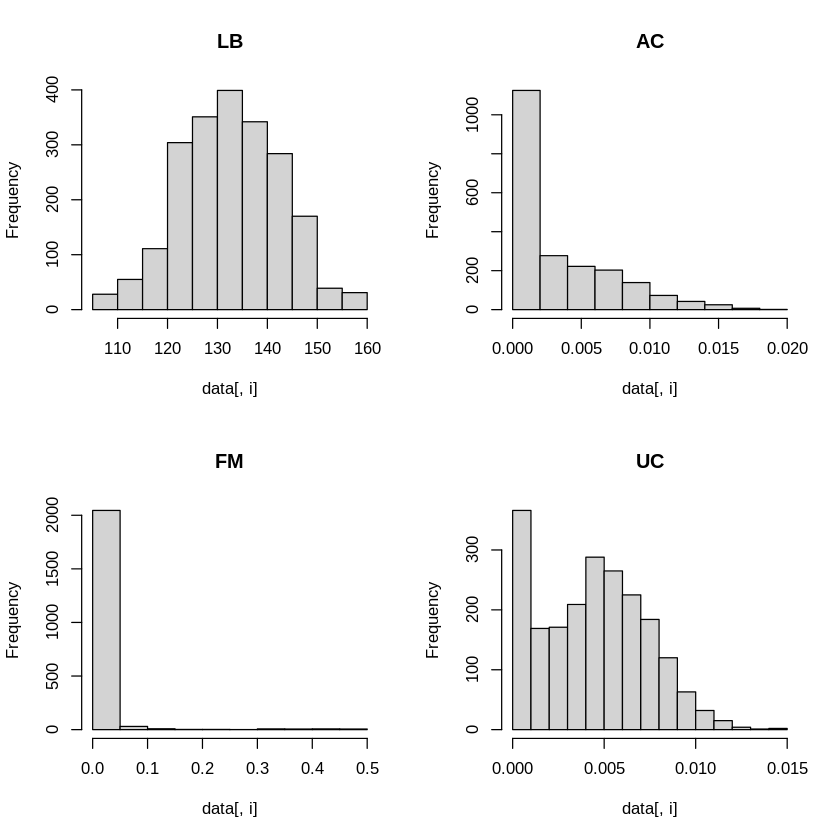

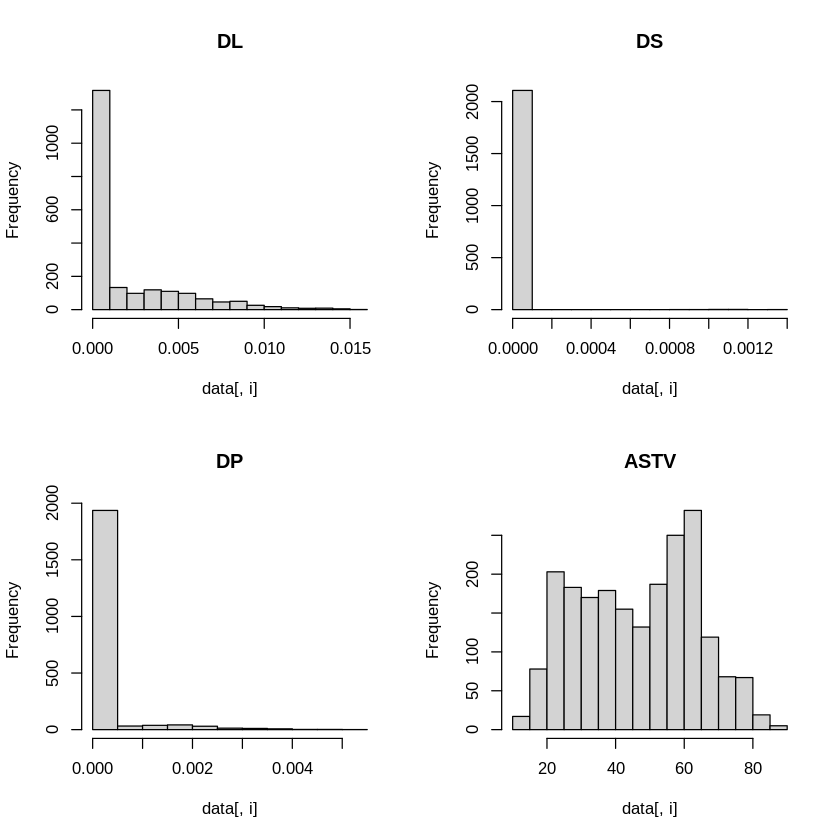

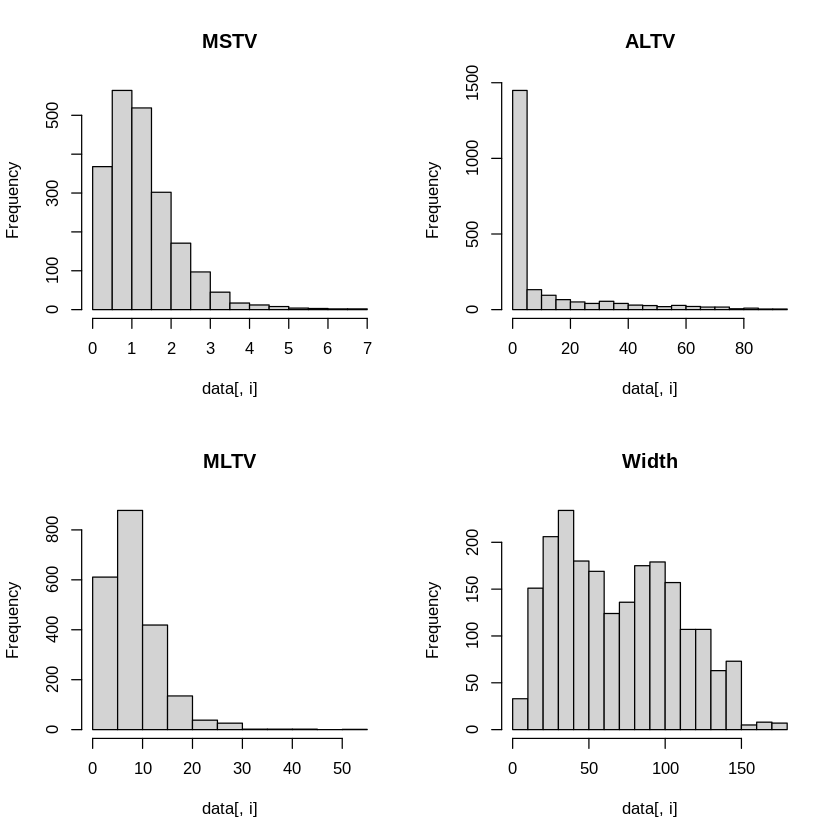

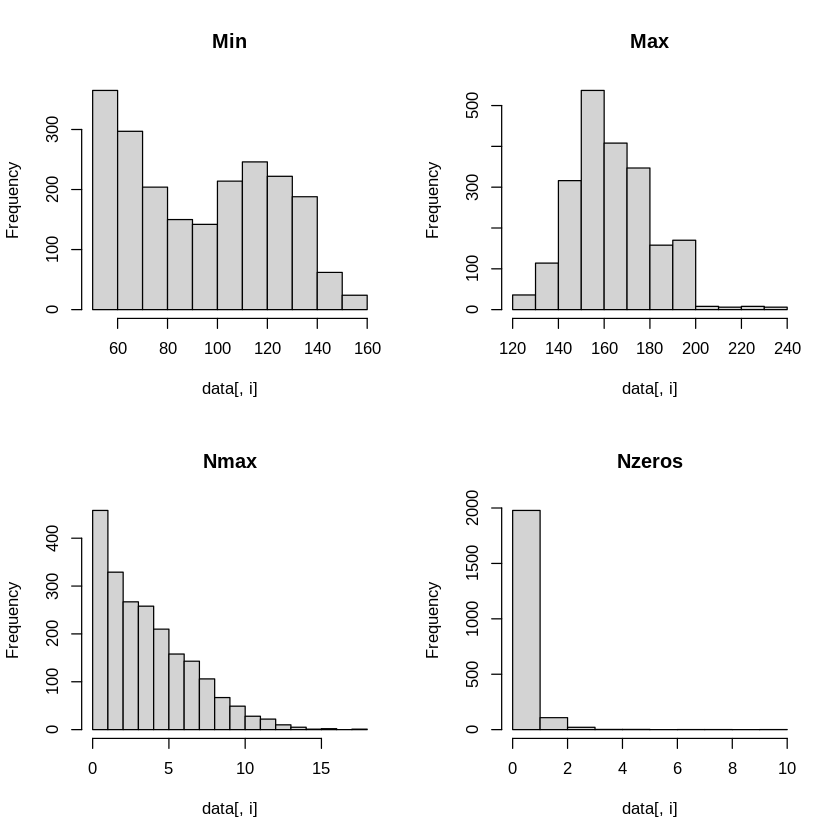

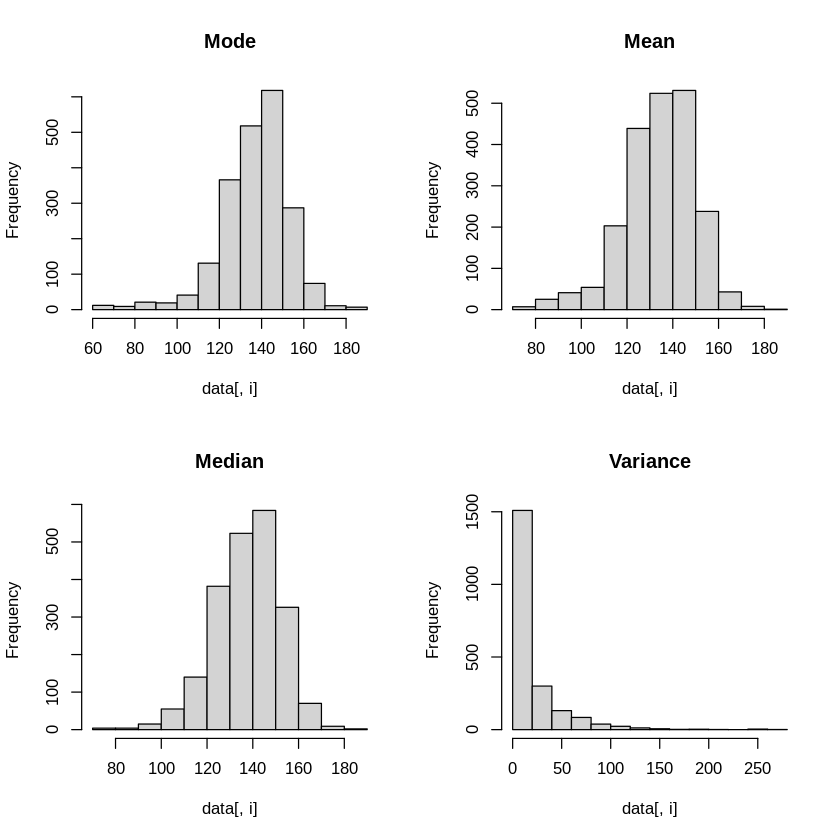

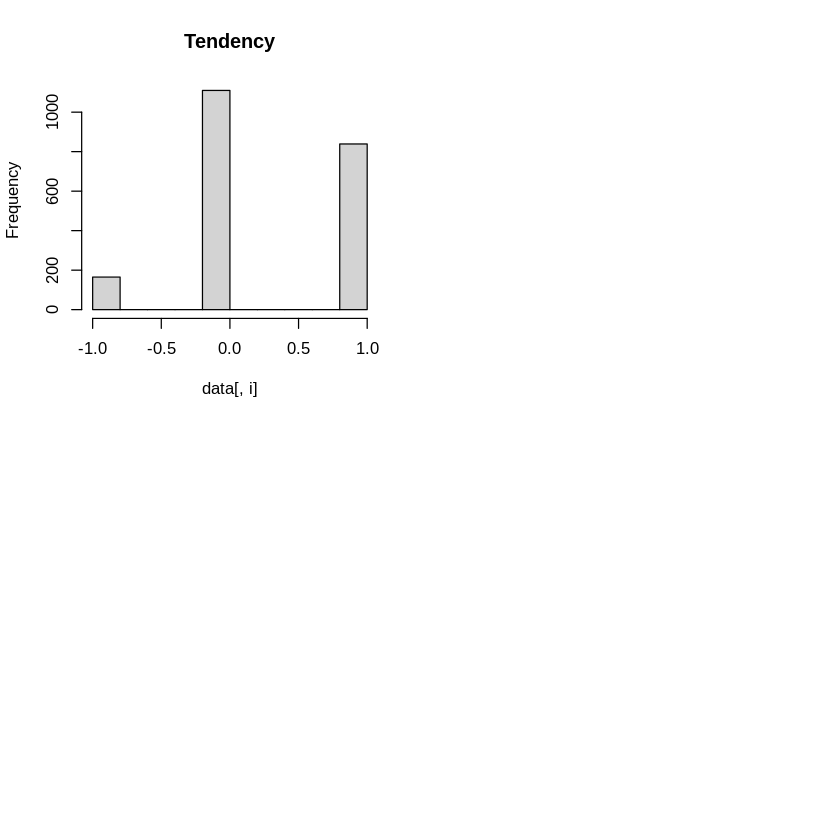

In [ ]:

# Set up the 2x2 grid
# par(mfrow=c(2,2))

# # Create histograms for four different variables
# hist(data$LB, main="Histogram of LB")
# hist(data$ASTV, main="Histogram of ASTV")
# hist(data$ALTV, main="Histogram of ALTV")
# hist(data$Width, main="Histogram of Width")


# Définir la taille de la figure
par(mfrow = c(2, 2))

# Parcourir toutes les colonnes (sauf la colonne NSP) et tracer les boxplots
for (i in 1:(ncol(data)-1)) {
  hist(data[,i], main = colnames(data)[i])
}

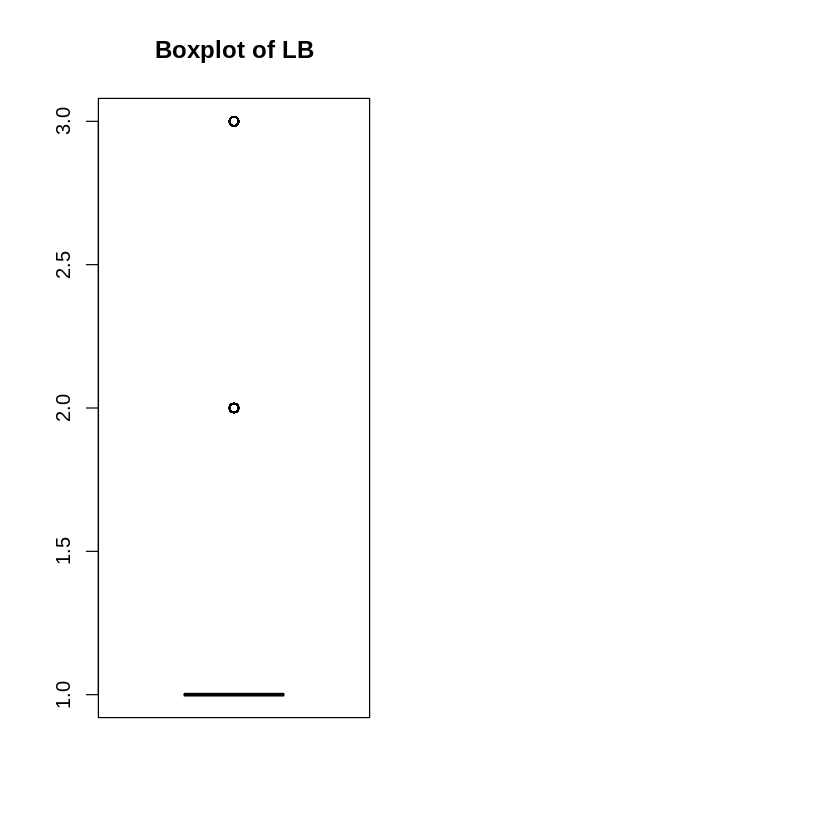

In [ ]:
# Diviser la fenêtre graphique en 1 rangée et 2 colonnes pour afficher 2 boxplots
par(mfrow=c(1,2))

# Afficher le premier boxplot
boxplot(data$NSP, main="Boxplot of LB", col="blue", border="black")

# Afficher le deuxième boxplot
# boxplot(log(data), main="Boxplot of log(LB)", col="red", border="black")

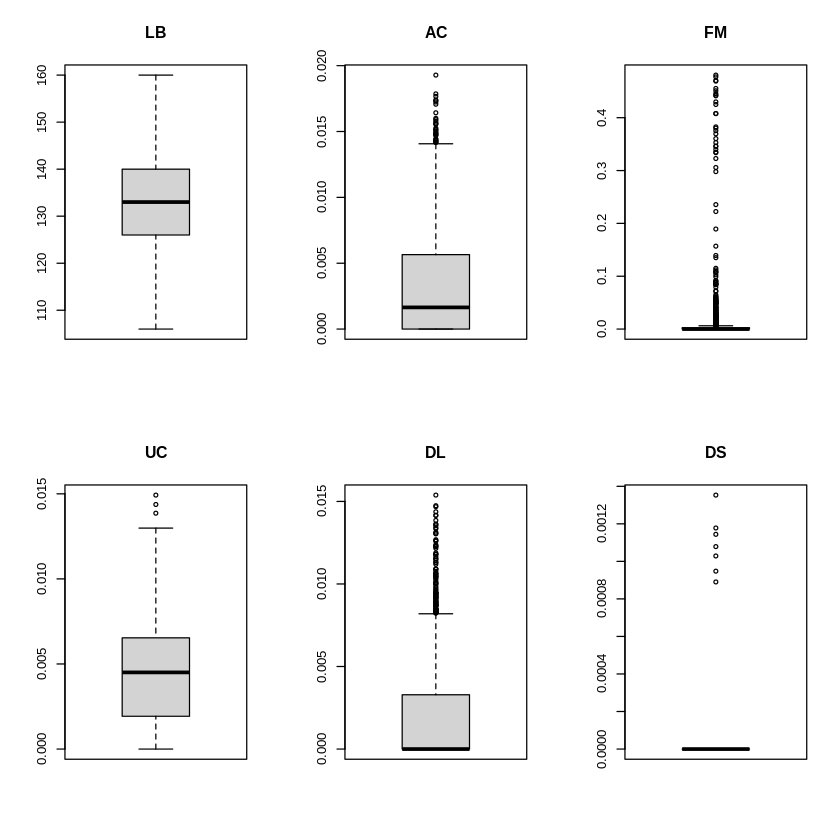

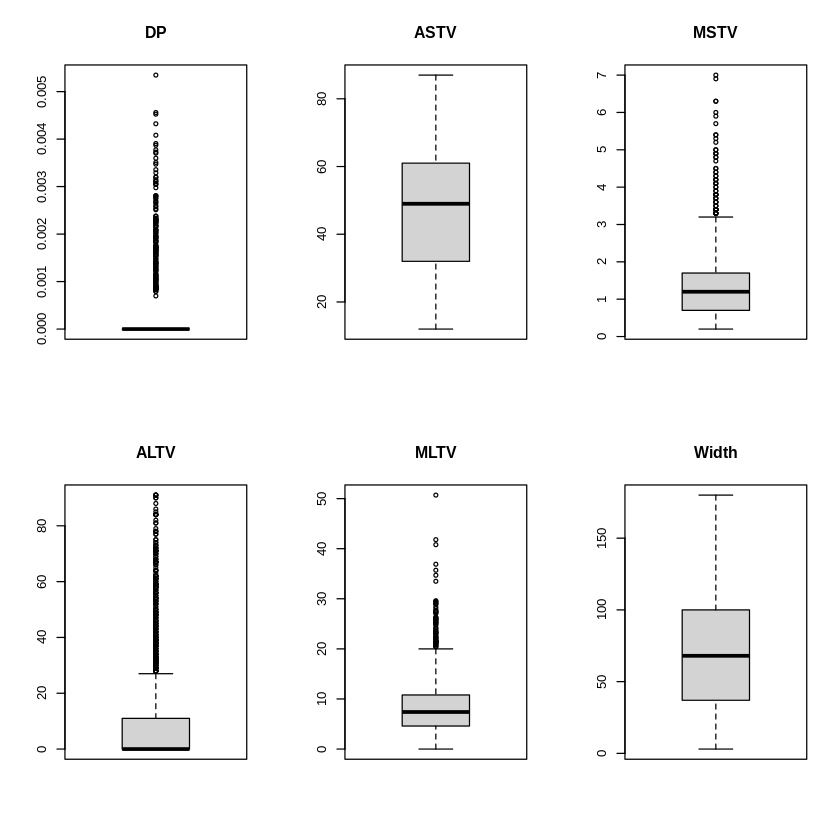

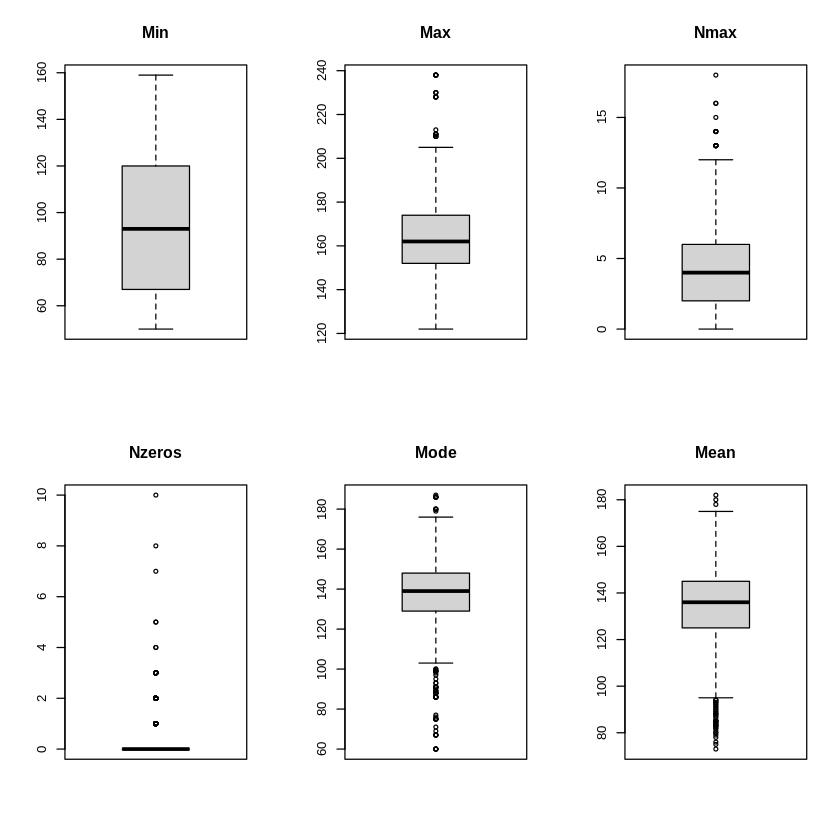

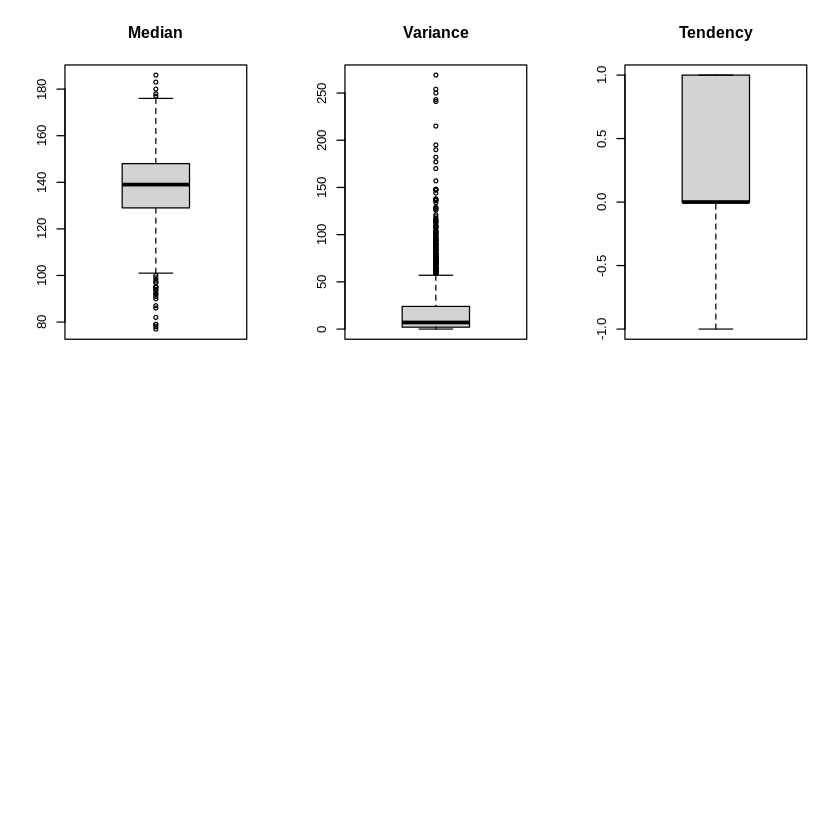

In [ ]:

# Définir la taille de la figure
par(mfrow = c(2, 3))

# Parcourir toutes les colonnes (sauf la colonne NSP) et tracer les boxplots
for (i in 1:(ncol(data)-1)) {
  boxplot(data[,i], main = colnames(data)[i])
}


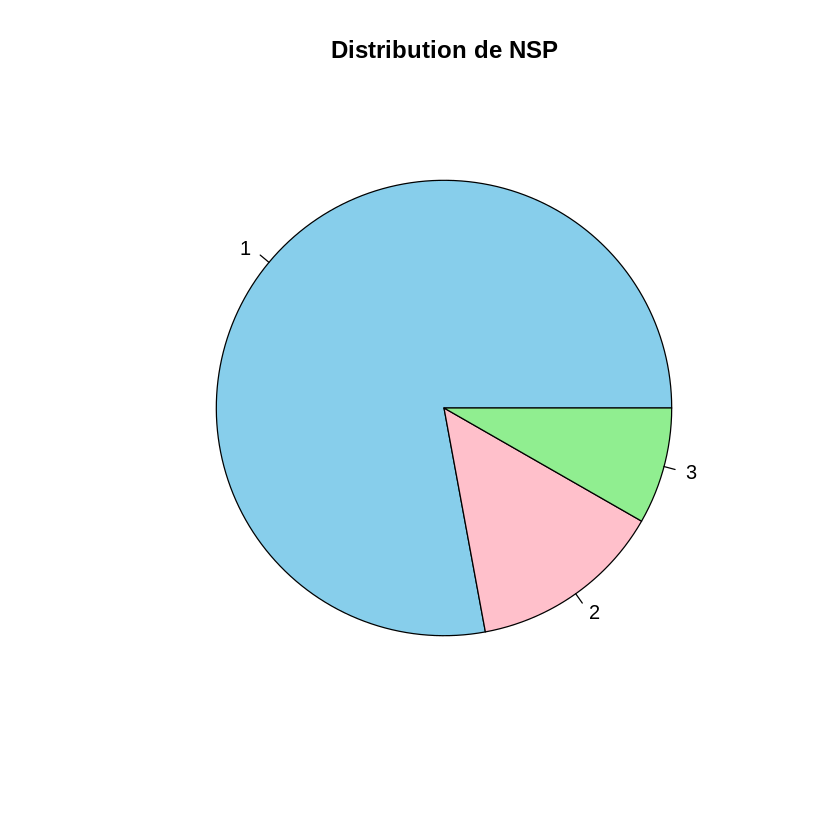

In [ ]:
pie(table(data$NSP), col = c("skyblue", "pink", "lightgreen"), main = "Distribution de NSP")


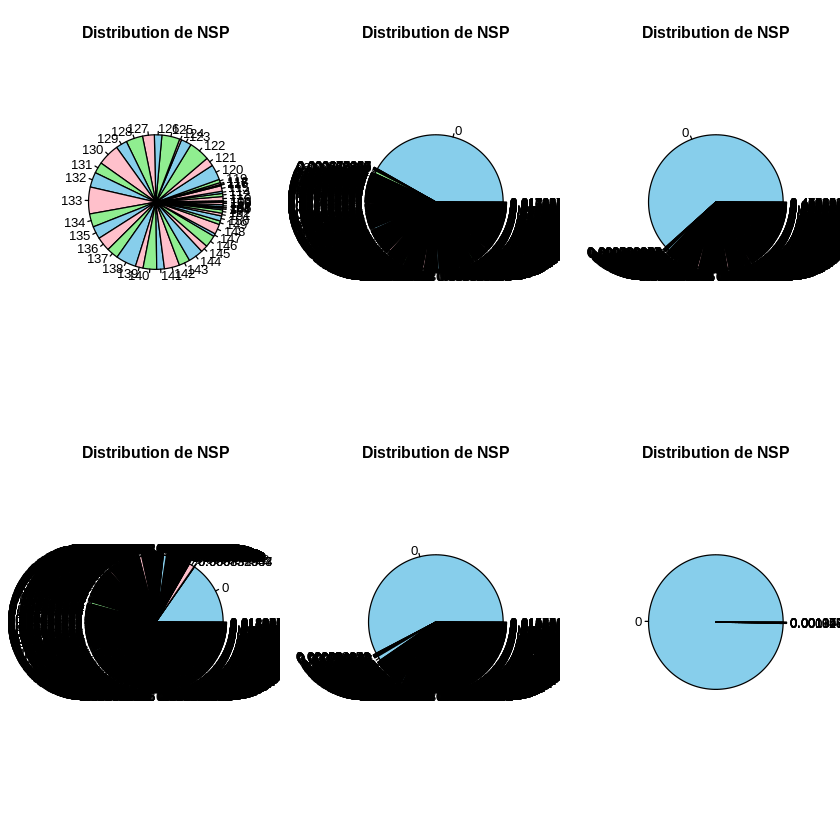

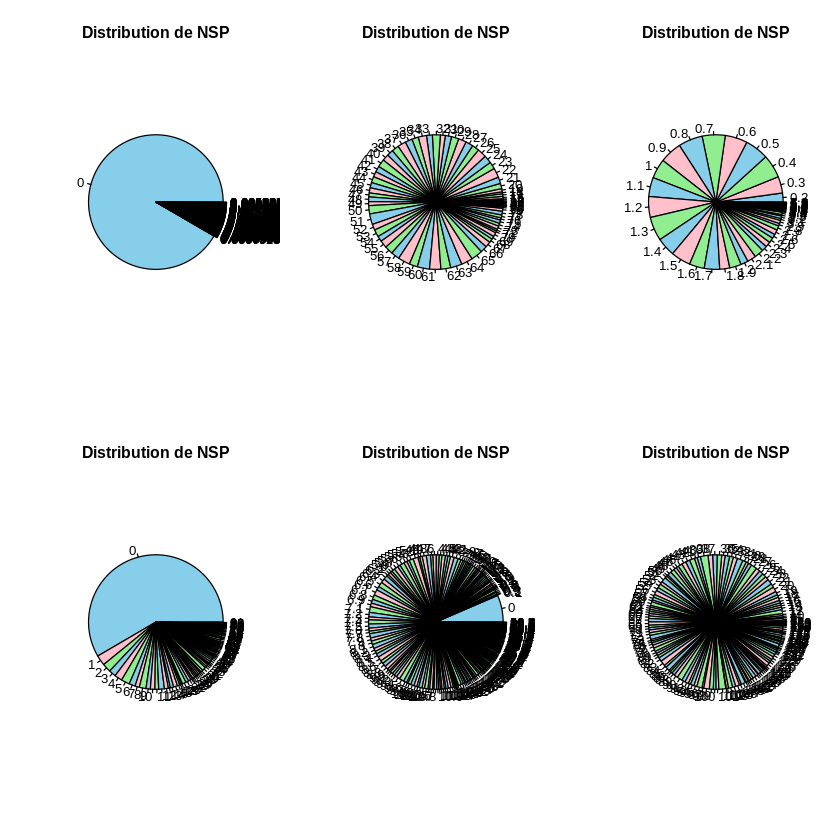

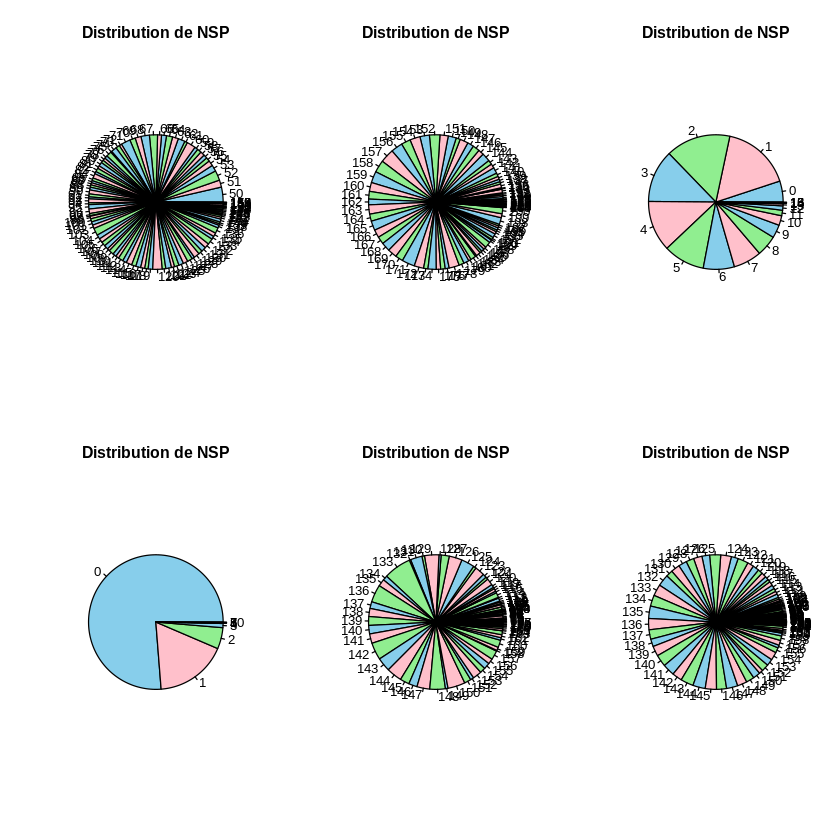

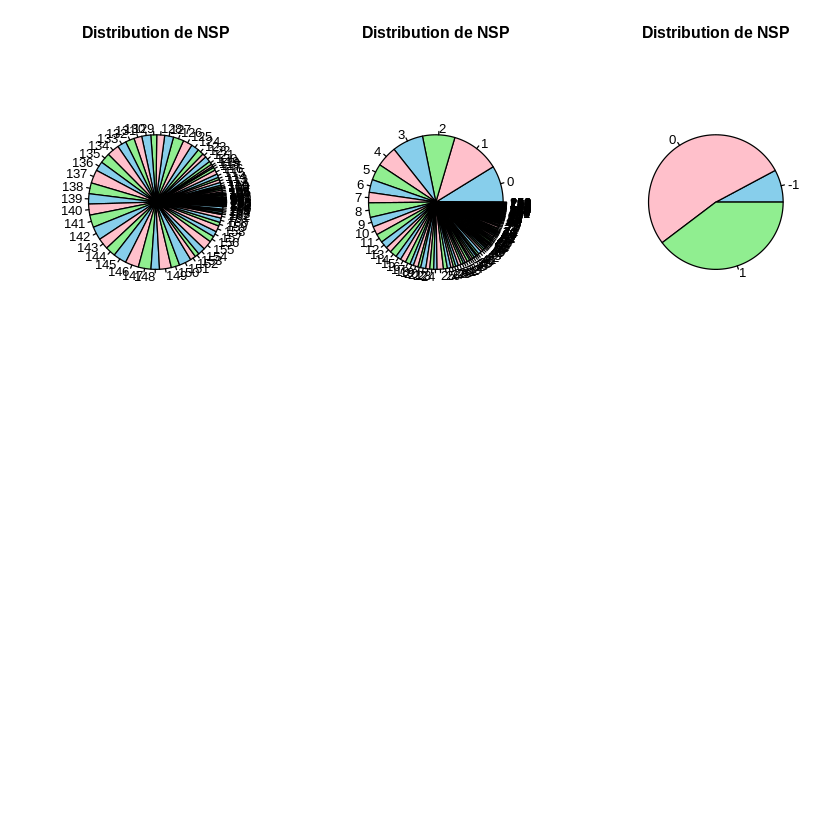

In [ ]:
# Définir la taille de la figure
par(mfrow = c(2, 3))

# Parcourir toutes les colonnes (sauf la colonne NSP) et tracer les boxplots
for (i in 1:(ncol(data)-1)) {
  pie(table(data[,i]), col = c("skyblue", "pink", "lightgreen"), main = "Distribution de NSP")

  # boxplot(data[,i], main = colnames(data)[i])
}

In [ ]:
# Définir le chemin et le nom de fichier pour l'image PNG
 png("boxplots.png")

# Afficher les boxplots en utilisant une disposition en 2x3
par(mfrow = c(2, 3))
for (i in 1:(ncol(data)-1)) {
  boxplot(data[,i], main = colnames(data)[i])
}

# Fermer le fichier PNG
 dev.off()


png 
  2

In [ ]:
# Créer un fichier PNG avec une largeur de 800 pixels et une hauteur de 600 pixels
png("boxplots2.png", width=1800, height=1600)

# Diviser l'espace de traçage en 2 lignes et 3 colonnes pour afficher les boxplots
par(mfrow = c(2, 3))

# Parcourir toutes les colonnes (sauf la colonne NSP) et tracer les boxplots
for (i in 1:(ncol(data)-1)) {
  boxplot(data[,i], main = colnames(data)[i])
}

# Fermer le fichier PNG
dev.off()


ERROR: ignored

In [ ]:
# Ouvrir un fichier PDF pour sauvegarder les boxplots
pdf("boxplots_ctg.pdf")

# Définir la disposition en rangées et colonnes
par(mfrow = c(2, 3))

# Parcourir toutes les colonnes (sauf la colonne NSP) et tracer les boxplots
for (i in 1:(ncol(data)-1)) {
  boxplot(data[,i], main = colnames(data)[i])
}

# Fermer le fichier PDF
dev.off()


png 
  2